# Цены на жилье в Москве и московской области
## 1.1 Постановка задачи

Используя имеющиеся данные о продающемся жилье в Москве и мск. области, построить модель, прогнозирующую его возможную стоимость в зависимости от особенностей квартиры.

Данный датасет содержит следующие признаки:
1. Price - Цена квартиры
2. Apartment type - Новостройка либо вторичное жилье
3. Metro station - Ближайшая станция метро
4. Minutes to metro - Время пути до ближайшей станции метро
5. Region - Географическое расположение (Москва или мск. область)
6. Number of rooms - Число комнат
7. Area - Общая площадь жилья (включая подсобные помещения и т.д.)
8. Living area - Жил. площадь
9. Kitchen area - Площадь кухни
10. Floor - Этаж, на котором расположена квартира
11. Number of floors - Общее число этажей в доме
12. Renovation - Наличие и вид проведенного ремонта или изменений

## 1.2 Получение данных

In [1]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder

In [2]:
data_raw = pd.read_csv("Moscow Housing data.csv")

## 1.3 Визуализация и обработка данных

In [3]:
data_raw.shape

(22676, 12)

In [4]:
data_raw

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation
...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,New building,Котельники,8.0,Moscow region,0.0,31.75,13.0,5.0,4.0,17,Cosmetic
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  object 
 2   Metro station     22676 non-null  object 
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 2.1+ MB


In [6]:
data_raw.describe()

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


Из таблицы выше для каждого числового признака можем видеть:
1. Среднее значение mean
2. Среднеквадратичное отклонение std
3. Минимальное значение min
4. Первый квартиль 25%
5. Медиану 25%
6. Третий квартиль 75%
7. Максимальное значение max

In [7]:
data_raw.describe(include = ['object'])

,Apartment type,Metro station,Region,Renovation
count,22676,22676,22676,22676
unique,2,547,2,4
top,Secondary,Красногвардейская,Moscow,Cosmetic
freq,13152,2697,16113,12788


Из таблицы выше видим что для категориальных признаков:
1. Среди продаваемого жилья преобладает вторичное
2. Имеется большое число уникальных значений в столбце Metro station
3. Среди продаваемого жилья преобладает жилье, находящееся в Москве
4. Наиболее частым видом ремонта является косметический

In [8]:
correlation_matrix = data_raw.corr(numeric_only=True)
correlation_matrix

,Price,Minutes to metro,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors
Price,1.000000,-0.105382,0.490820,0.794226,0.709296,0.582940,0.019080,-0.022134
Minutes to metro,-0.105382,1.000000,-0.082357,-0.094937,-0.085614,-0.062436,0.017230,-0.031209
Number of rooms,0.490820,-0.082357,1.000000,0.687145,0.657565,0.476534,0.087446,0.074045
Area,0.794226,-0.094937,0.687145,1.000000,0.906604,0.731963,0.083480,0.044465
Living area,0.709296,-0.085614,0.657565,0.906604,1.000000,0.610039,0.072477,0.036737
Kitchen area,0.582940,-0.062436,0.476534,0.731963,0.610039,1.000000,0.133737,0.108035
Floor,0.019080,0.017230,0.087446,0.083480,0.072477,0.133737,1.000000,0.596803
Number of floors,-0.022134,-0.031209,0.074045,0.044465,0.036737,0.108035,0.596803,1.000000


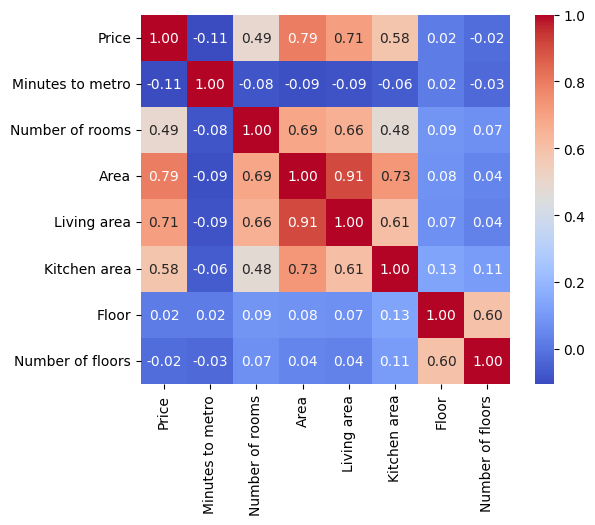

In [9]:
sns.heatmap(correlation_matrix, square = True, annot = True, fmt='.2f', cmap="coolwarm")
pass

Из полученной корреляционной матрицы следуют довольно тривиальные выводы:
1. Цена жилья сильно коррелирует с жил. площадью и общей площадью квартиры, имеется средняя корреляция с числом комнат
2. Общая площадь и жилая площадь, как и площадь кухни сильно связаны между собой

Исходя из этого, возможно отбросить такой признак как площадь кухни, поскольку эта площадь входит в общую площадь квартиры.   
Признак жилой площади лучше оставить, поскольку он имеет больше влияния на стоимость. Например квартира с большей общей площадью, но меньшей жилой может стоить дешевле чем квартира, для которой верно обратное.

In [10]:
data_raw = data_raw.drop('Kitchen area', axis=1)

Изучим датасет на наличие выбросов

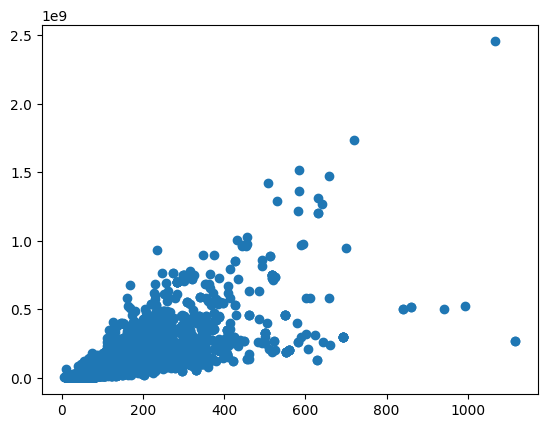

In [11]:
plt.scatter(x='Area', y='Price', data=data_raw)
pass

Можем видеть что имеются выбивающиеся значения, которые нам стоит отбросить

In [12]:
rows_to_drop = data_raw[
    (data_raw['Price'] < data_raw['Price'].quantile(0.005)) | (data_raw['Price'] > data_raw['Price'].quantile(0.995)) | 
    (data_raw['Area']  < data_raw['Area' ].quantile(0.005)) | (data_raw['Area']  > data_raw['Area' ].quantile(0.995))].index
data_raw = data_raw.drop(rows_to_drop)
data_raw.shape

(22271, 11)

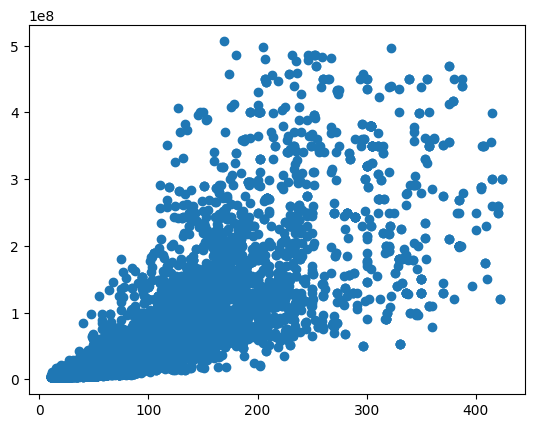

In [13]:
plt.scatter(x='Area', y='Price', data=data_raw)
pass

Было отброшено 405 значений, находящихся в 99.5 и 0.005 квантилях

## 1.4 Обработка пропущенных значений

In [14]:
data_raw.isna().sum()

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

В нашем наборе данных пропущенных значений не имеется

## 1.5  Обработка категориальных признаков, нормализация


Разобьем признаки на 2 вида: числовые и категориальные 

In [15]:
data_raw.dtypes

Price               float64
Apartment type       object
Metro station        object
Minutes to metro    float64
Region               object
Number of rooms     float64
Area                float64
Living area         float64
Floor               float64
Number of floors      int64
Renovation           object
dtype: object

In [16]:
categorial = [a for a in data_raw.columns if data_raw[a].dtype.name == 'object']
numerical = [a for a in data_raw.columns if data_raw[a].dtype.name != 'object']
print(categorial)
print(numerical)

['Apartment type', 'Metro station', 'Region', 'Renovation']
['Price', 'Minutes to metro', 'Number of rooms', 'Area', 'Living area', 'Floor', 'Number of floors']


Для признаков Region и Apartment type существуют только 2 уникальных значения, и поэтому мы можем бинаризировать их.  


In [17]:
#Москва = 1, Регион = 0
data_raw = data_raw.replace({'Moscow region' : 0, 'Moscow' : 1})
data_raw['Region'] = data_raw['Region'].astype('int64')

#Новостройка = 1, вторичное жилье = 0
data_raw = data_raw.replace({'Secondary' : 0, 'New building' : 1})
data_raw['Apartment type'] = data_raw['Apartment type'].astype('int64')

Признаки Metro station и Renovation мы можем векторизовать

In [18]:
encoder = OneHotEncoder(drop = 'if_binary', sparse_output = False)
encoder.fit(data_raw[['Renovation']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [19]:
dummies1 = pd.DataFrame(encoder.transform(data_raw[['Renovation']]),
                      columns = encoder.get_feature_names_out(), index=data_raw.index)
dummies1

,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
22671,1.0,0.0,0.0,0.0
22672,1.0,0.0,0.0,0.0
22673,1.0,0.0,0.0,0.0
22674,1.0,0.0,0.0,0.0


In [20]:
encoder.fit(data_raw[['Metro station']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [21]:
dummies2 = pd.DataFrame(encoder.transform(data_raw[['Metro station']]),
                      columns = encoder.get_feature_names_out(), index=data_raw.index)
dummies2

,Metro station_ Авиамоторная,Metro station_ Автозаводская,Metro station_ Академическая,Metro station_ Александровский сад,Metro station_ Алексеевская,Metro station_ Алма-Атинская,Metro station_ Алтуфьево,Metro station_ Аминьевская,Metro station_ Андроновка,Metro station_ Аникеевка,...,Metro station_Шоссе энтузиастов,Metro station_Щелковская,Metro station_Щербинка,Metro station_Щукинская,Metro station_Электрозаводская,Metro station_Юго-Восточная,Metro station_Юго-Западная,Metro station_Южная,Metro station_Ясенево,Metro station_Яхромская
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
data = data_raw.drop('Metro station', axis=1)
data = data.drop('Renovation', axis=1)

In [23]:
data = pd.concat((data, dummies1, dummies2), axis=1)

In [24]:
data

,Price,Apartment type,Minutes to metro,Region,Number of rooms,Area,Living area,Floor,Number of floors,Renovation_Cosmetic,...,Metro station_Шоссе энтузиастов,Metro station_Щелковская,Metro station_Щербинка,Metro station_Щукинская,Metro station_Электрозаводская,Metro station_Юго-Восточная,Metro station_Юго-Западная,Metro station_Южная,Metro station_Ясенево,Metro station_Яхромская
0,6300000.0,0,6.0,0,1.0,30.60,11.1,25.0,25,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9000000.0,0,2.0,0,1.0,49.20,20.0,6.0,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11090000.0,0,14.0,0,1.0,44.70,16.2,10.0,25,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8300000.0,0,8.0,0,1.0,35.10,16.0,12.0,33,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6450000.0,0,6.0,0,1.0,37.70,15.2,5.0,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22671,4768792.0,1,8.0,0,0.0,31.75,13.0,4.0,17,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22672,5900000.0,1,25.0,0,1.0,31.60,10.1,11.0,15,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22673,3700000.0,1,30.0,0,0.0,18.00,15.0,17.0,17,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22674,5768869.0,1,14.0,0,2.0,36.39,22.0,12.0,14,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Проведем нормализацию, исключив из рассмотрения столбец Price для удобства дальнейшего рассмотрения

In [25]:
data_price = data
data = (data - data.min(axis=0))/(data.max(axis=0) - data.min(axis=0))

In [26]:
data = data.drop('Price', axis=1)
data = pd.concat((data_price, data), axis=1)

In [38]:
data = data.sample(frac = 1)

In [39]:
data

,Price,Apartment type,Minutes to metro,Region,Number of rooms,Area,Living area,Floor,Number of floors,Renovation_Cosmetic,...,Metro station_Шоссе энтузиастов,Metro station_Щелковская,Metro station_Щербинка,Metro station_Щукинская,Metro station_Электрозаводская,Metro station_Юго-Восточная,Metro station_Юго-Западная,Metro station_Южная,Metro station_Ясенево,Metro station_Яхромская
892,450000000.0,0,10.0,1,6.0,338.40,213.0,10.0,15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20359,12364800.0,1,19.0,1,2.0,67.20,36.1,16.0,11,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10007,59000000.0,0,3.0,1,4.0,185.00,112.0,11.0,19,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15418,14473080.0,1,13.0,1,3.0,89.34,54.0,6.0,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1567,10950000.0,0,4.0,1,0.0,29.30,17.0,20.0,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5062,15900000.0,0,23.0,1,1.0,45.00,18.7,19.0,23,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9588,20300000.0,0,32.0,1,4.0,97.70,62.1,17.0,18,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6918,20900000.0,0,2.0,1,2.0,56.00,26.0,21.0,19,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21131,7448395.0,1,5.0,0,2.0,56.70,30.8,1.0,20,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Мы подготовили данные и готовы использовать алгоритмы машинного обучения

## 1.6 Разбиение на обучающую и тестовую выборку

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
y = data['Price']
#lab = LabelEncoder()
#y_transformed = lab.fit_transform(y)

X = data.drop('Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

## 1.7 Метод k-ближайших соседей (регрессор)

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

Рассмотрим для k=3, k=5, k=10

In [44]:
k = 3
knr = KNeighborsRegressor(n_neighbors=k)
knr.fit(X_train, y_train)
y_train_predict = knr.predict(X_train)
y_test_predict  = knr.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**0.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**0.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("Значение RMSE на тестовой и обучающей выборке для ", k, " соседей: ", RMSE_test, RMSE_train)
print("Значение R2 на тестовой и обучающей выборке для ", k, " соседей: ", R2_test, R2_train)

Значение RMSE на тестовой и обучающей выборке для  3  соседей:  30569420.0979098 19766023.971158937
Значение R2 на тестовой и обучающей выборке для  3  соседей:  0.7459660746449941 0.8846027022430503


In [45]:
k = 5
knr = KNeighborsRegressor(n_neighbors=k)
knr.fit(X_train, y_train)
y_train_predict = knr.predict(X_train)
y_test_predict  = knr.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**0.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**0.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("Значение RMSE на тестовой и обучающей выборке для ", k, " соседей: ", RMSE_test, RMSE_train)
print("Значение R2 на тестовой и обучающей выборке для ", k, " соседей: ", R2_test, R2_train)

Значение RMSE на тестовой и обучающей выборке для  5  соседей:  30316395.640175827 23629572.5408643
Значение R2 на тестовой и обучающей выборке для  5  соседей:  0.7501539712452618 0.8350817436976152


In [46]:
k = 10
knr = KNeighborsRegressor(n_neighbors=k)
knr.fit(X_train, y_train)
y_train_predict = knr.predict(X_train)
y_test_predict  = knr.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**0.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**0.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("Значение RMSE на тестовой и обучающей выборке для ", k, " соседей: ", RMSE_test, RMSE_train)
print("Значение R2 на тестовой и обучающей выборке для ", k, " соседей: ", R2_test, R2_train)

Значение RMSE на тестовой и обучающей выборке для  10  соседей:  30680100.478019703 26696288.58219333
Значение R2 на тестовой и обучающей выборке для  10  соседей:  0.7441232218138064 0.7894967621434494


Видим что наилучшее (наименьшее) значение RMSE на тестировочной выборке достигается при значении k=5. Соответственно в этом случае наша модель дает меньше грубых ошибок.  
Аналогично, для k=5 достигается самое близкое к 1 значение R2 на тестировочной выборке.  
Так же заметим что на тренировочной выборке модель показывает результат лучше чем на тестировочной, т.е. происходит переобучение.

## 2.1 Логистическая регрессия

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
Logistic = LogisticRegression(max_iter = 50)
Logistic.fit(X_train, y_train)
y_train_predict = Logistic.predict(X_train)
y_test_predict  = Logistic.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict)**0.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**0.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("Значение RMSE на тестовой и обучающей выборке:", RMSE_test, RMSE_train)
print("Значение R2 на тестовой и обучающей выборке:", R2_test, R2_train)

C:\Users\Владимир-ПК\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Значение RMSE на тестовой и обучающей выборке: 48991719.64986414 46555814.94566586
Значение R2 на тестовой и обучающей выборке: 0.3475267876247192 0.35981591969570204


## 2.2 RandomForestRegressor

In [50]:
from sklearn import ensemble

Попробуем найти оптимальное значение параметра n_estimators

In [61]:
parameters = np.linspace(100,200,5, dtype=int)

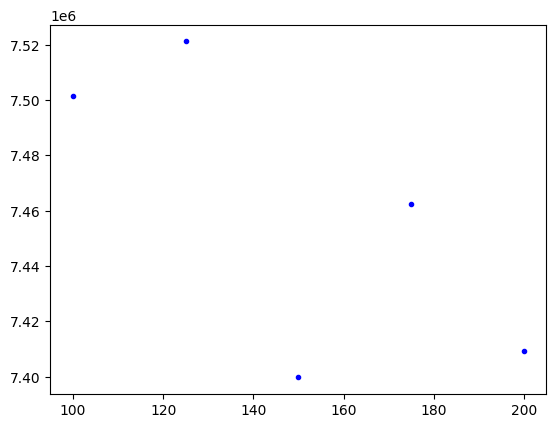

In [62]:
for parameter in parameters:
    rf = ensemble.RandomForestRegressor(n_estimators = parameter)
    rf.fit(X_train, y_train)
    y_train_predict = rf.predict(X_train)
    y_test_predict  = rf.predict(X_test)
    RMSE_train = mean_squared_error(y_train, y_train_predict)**0.5
    plt.plot(parameter, RMSE_train, 'b.')

Видим, что наименьшее значение RMSE_train достигается при n_estimators = 150  
Обучим модель при данном значении параметра

In [63]:
rf = ensemble.RandomForestRegressor(n_estimators = 150)
rf.fit(X_train, y_train)
y_train_predict = rf.predict(X_train)
y_test_predict  = rf.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**0.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**0.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)

print("Значение RMSE на тестовой и обучающей выборке:", RMSE_test, RMSE_train)
print("Значение R2 на тестовой и обучающей выборке:", R2_test, R2_train)

Значение RMSE на тестовой и обучающей выборке: 21684712.823766492 7507057.718679155
Значение R2 на тестовой и обучающей выборке: 0.8721723900929038 0.9833545127026222


## 2.3 Полносвязная нейронная сеть

In [73]:
from sklearn.neural_network import MLPRegressor


In [78]:
mlp = MLPRegressor(hidden_layer_sizes = (2, 2), max_iter=2000)
mlp.fit(X_train, y_train)
y_train_predict = mlp.predict(X_train)
y_test_predict  = mlp.predict(X_test)
RMSE_train = mean_squared_error(y_train, y_train_predict)**.5
RMSE_test  = mean_squared_error(y_test,  y_test_predict)**.5
R2_train = r2_score(y_train, y_train_predict)
R2_test  = r2_score(y_test,  y_test_predict)
print("Значение RMSE на тестовой и обучающей выборке:", RMSE_test, RMSE_train)
print("Значение R2 на тестовой и обучающей выборке:", R2_test, R2_train)

C:\Users\Владимир-ПК\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


Значение RMSE на тестовой и обучающей выборке: 33234278.801586762 32868790.538087584
Значение R2 на тестовой и обучающей выборке: 0.6997452848495738 0.680901728824469


## 3. Вывод

Мы провели исследование и рассмотрели несколько моделей для решения задачи регрессии. В нашем случае наиболее наиболее хорошо себя показал метод RandomForest. Так же, при использовании каждого метода, мы столкнулись с явлением переобученности, поскольку показатели на тестовой выборке были хуже чем на тренировочной.